**`LOGIC IS MINE AND CODE HAS BEEN CREDITED TO THE SOURCE FROM WHICH IT HAS BEEN GENERATED AND WE ARE ABLE TO SOLVE LEGENDRE ORDER(0,1,2) WITH THIS MODEL. BUT WILL MODEIFY IT TO A GOOD ONE IN FUTURE.`**

In [ ]:
# Another experiment with the lEGENDRE's:
# Credit to Claude.ai

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
def legendre_eq(x, y, n):
    # Legendre's equation: (1-x^2)y'' - 2xy' + n(n+1)y = 0
    y_x = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    y_xx = torch.autograd.grad(y_x, x, grad_outputs=torch.ones_like(y_x), create_graph=True)[0]
    return (1 - x**2) * y_xx - 2 * x * y_x + n * (n + 1) * y

def train_pinn(n, epochs=5000):
    model = PINN()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    x = torch.linspace(-1, 1, 100).reshape(-1, 1).requires_grad_(True)

    for epoch in range(epochs):
        optimizer.zero_grad()

        y_pred = model(x)
        eq_loss = torch.mean(legendre_eq(x, y_pred, n)**2)

        # Boundary conditions for Legendre polynomials
        bc_loss = (y_pred[0] - 1)**2 + (y_pred[-1] - (-1)**n)**2

        loss = eq_loss + bc_loss
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return model

def plot_results(model, n):
    x = torch.linspace(-1, 1, 100).reshape(-1, 1)
    y_pred = model(x).detach().numpy()

    plt.figure(figsize=(10, 6))
    plt.plot(x, y_pred, label='PINN Solution')
    plt.title(f"Legendre Polynomial P_{n}(x)")
    plt.xlabel('x')
    plt.ylabel(f'P_{n}(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch [500/5000], Loss: 0.0054
Epoch [1000/5000], Loss: 0.0001
Epoch [1500/5000], Loss: 0.0000
Epoch [2000/5000], Loss: 0.0000
Epoch [2500/5000], Loss: 0.0020
Epoch [3000/5000], Loss: 0.0000
Epoch [3500/5000], Loss: 0.0000
Epoch [4000/5000], Loss: 0.0000
Epoch [4500/5000], Loss: 0.0000
Epoch [5000/5000], Loss: 0.0000


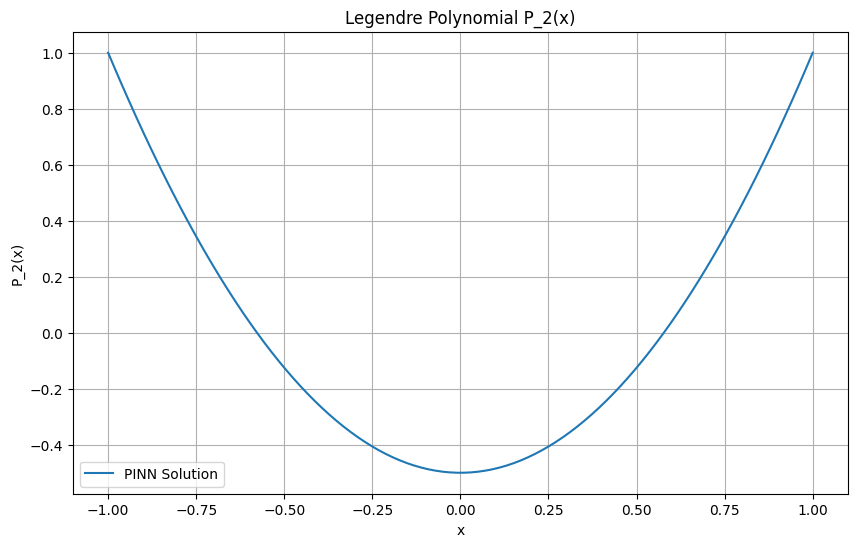

In [ ]:
# Solve for n=2 (second-order Legendre polynomial)
n = 2
trained_model = train_pinn(n)
plot_results(trained_model, n)

**`OVERFITTING FOR 0,1,2 BUT WILL WORK FOR ANY POINTS IN THE RANGE OF (-1,1) AND CAN DO FOR ANY ARBITARY RANGE IN THE REAL INTERVAL BUT WE NEED TO IMPOSE THE BOUNDARY CONDITION OR INSTEAD OF BOUNDARY ONE CAN APPLY THE CONDITIONS AT VARIOUS POINTS IN THE INTERVAL SO THAT OUR SOLUTION MAY BE ABLE TO MINISE  THE LOSS AND SHOULDN'T OSSCILATE FOR GOOD RANGE IN REAL LINE.`**